In [273]:
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/klno/diamond --filename=out.log --output=../data/diamond-klno.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/k-sos-mp2/diamond --filename=out.log --output=../data/diamond-k-sos-mp2.json
%run ../collect.py --root_dir=/Users/yangjunjie/work/fftisdf-for-dmet/fftisdf-with-dmet-main/benchmark/ref-kpts/diamond --filename=out.log --output=../data/diamond-ref-kpts.json

In [274]:
import json, numpy
from matplotlib import pyplot as plt

data = {}

d1 = None
with open('../data/diamond-k-sos-mp2.json', 'r') as f:
    d1 = json.load(f)
d1 = {"/".join(k.split("/")[-2:]): v for k, v in d1.items()}

d2 = None
with open('../data/diamond-ref-kpts.json', 'r') as f:
    d2 = json.load(f)
d2 = {"/".join(k.split("/")[-2:]): v for k, v in d2.items()}

for k1 in sorted([k for k, v in d1.items()]):
    v1 = d1[k1]
    kmesh = k1.split("/")[-2]

    ene_krhf = v1['ene_krhf']
    ene_krhf_ref = numpy.nan
    ene_os_ref = numpy.nan
    ene_mp2_ref = numpy.nan
    ene_corr_mp2_ref = numpy.nan
    ene_ccsd_ref = numpy.nan
    ene_corr_ccsd_ref = numpy.nan

    if k1 in d2:
        k2 = k1
        v2 = d2[k2]
                
        ene_krhf_ref = v2['ene_krhf']
        ene_os_ref = v2['ene_corr_os']
        ene_mp2_ref = v2['ene_kmp2']
        ene_corr_mp2_ref = v2['ene_corr_kmp2']
        ene_ccsd_ref = v2.get('ene_kccsd', numpy.nan)
        ene_corr_ccsd_ref = v2.get('ene_corr_kccsd', numpy.nan)
        assert abs(ene_corr_mp2_ref + ene_krhf_ref - ene_mp2_ref) < 1e-6
        # assert abs(ene_corr_ccsd_ref + ene_krhf_ref - ene_ccsd_ref) < 1e-6
    
    out = ""
    ee = []
    for kk, vv in v1.items():
        if "ene_os" in kk:
            ee.append(vv)
            err = vv - ene_os_ref
            out += "%s/%s ene_os = % 12.8f, err = % 6.2e\n" % (k1, kk, vv, err)

    if len(ee) < 3:
        continue

    ene_os_sol = ee[2]
    err = ene_os_sol - ene_os_ref
    out += "%s %s = % 12.8f, err = % 6.2e\n" % (k1[:-1], "ene_os", ene_os_sol, err)
    # print(out)

    if "fftisdf-60-14" in k1:
        print(k1)
        data[kmesh] = {
            "ene_os": ene_os_sol,
            "ene_krhf": ene_krhf,
            "ene_kmp2": ene_mp2_ref,
            "ene_corr_mp2": ene_corr_mp2_ref,
            "ene_kccsd": ene_ccsd_ref,
            "ene_corr_ccsd": ene_corr_ccsd_ref,
        }

print(len(data))

1-1-2/fftisdf-60-14
1-2-2/fftisdf-60-14
2-2-2/fftisdf-60-14
2-2-3/fftisdf-60-14
2-3-3/fftisdf-60-14
3-3-3/fftisdf-60-14
3-3-4/fftisdf-60-14
3-4-4/fftisdf-60-14
4-4-4/fftisdf-60-14
4-4-5/fftisdf-60-14
4-5-5/fftisdf-60-14
5-5-5/fftisdf-60-14
5-5-6/fftisdf-60-14
5-6-6/fftisdf-60-14
6-6-6/fftisdf-60-14
6-6-7/fftisdf-60-14
6-7-7/fftisdf-60-14
7-7-7/fftisdf-60-14
7-7-8/fftisdf-60-14
7-8-8/fftisdf-60-14
8-10-10/fftisdf-60-14
8-8-10/fftisdf-60-14
8-8-8/fftisdf-60-14
23


nk =   2, ene_krhf = -10.57682410, ene_sos_mp2 = -10.79326588, ene_mp2 = -10.79444797, ene_ccsd = -10.82239475
nk =   4, ene_krhf = -10.82926354, ene_sos_mp2 = -11.05036103, ene_mp2 = -11.05737409, ene_ccsd = -11.07757830
nk =   8, ene_krhf = -10.95722433, ene_sos_mp2 = -11.17958906, ene_mp2 = -11.18984248, ene_ccsd = -11.20866367
nk =  18, ene_krhf = -11.02151491, ene_sos_mp2 = -11.25340190, ene_mp2 = -11.27117904, ene_ccsd = -11.28352051
nk =  27, ene_krhf = -11.02227872, ene_sos_mp2 = -11.25604321, ene_mp2 = -11.27435564, ene_ccsd = -11.28617184
nk =  36, ene_krhf = -11.02794901, ene_sos_mp2 = -11.26467121, ene_mp2 = -11.28490444, ene_ccsd = -11.29482566
nk =  48, ene_krhf = -11.03012751, ene_sos_mp2 = -11.26858440, ene_mp2 = -11.28989990, ene_ccsd = -11.29878902
nk =  64, ene_krhf = -11.02874276, ene_sos_mp2 = -11.26788283, ene_mp2 = -11.28943564, ene_ccsd = -11.29807703
nk = 100, ene_krhf = -11.02918477, ene_sos_mp2 = -11.27042144, ene_mp2 = -11.29291282, ene_ccsd = -11.30062989
n

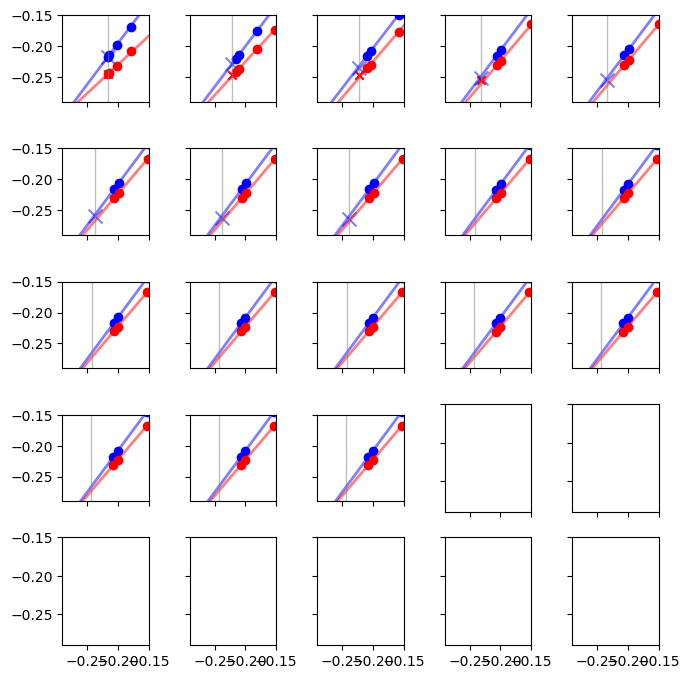

In [275]:
d = None
with open('../data/diamond-klno.json', 'r') as f:
    d = json.load(f)

nx = 5
ny = 5
fig, axs = plt.subplots(nx, ny, figsize=(7, 7), sharex=True, sharey=True)

l = ["1-1-2", "1-2-2", "2-2-2", "2-3-3", "3-3-3"]
l += ["3-3-4", "3-4-4", "4-4-4", "4-5-5", "5-5-5"]
l += ["5-5-6", "5-6-6", "6-6-6", "6-7-7", "7-7-7"]
l += ["7-7-8", "7-8-8", "8-8-8"]


np = 1
# for ik, k1 in enumerate(sorted([k for k, v in data.items()])):

for ik, k1 in enumerate(l):
    v1 = data[k1]
    kk = [k for k, v in d.items() if k1 + "/fftisdf-60-14" in k]
    
    xx = [d[k]['ene_klno_corr_os']   for k in kk if 'ene_klno_corr_os' in d[k]]
    yy = [d[k]['ene_klno_corr_mp2']  for k in kk if 'ene_klno_corr_os' in d[k]]
    zz = [d[k]['ene_klno_corr_ccsd'] for k in kk if 'ene_klno_corr_os' in d[k]]

    assert len(xx) == len(yy) == len(zz)

    xx = numpy.array(xx) * 1.3
    yy = numpy.array(yy)
    zz = numpy.array(zz)

    
    ax = axs[ik // ny, ik % nx]

    # fit xx and yy
    x = numpy.array(xx)
    y = numpy.array(yy)
    ix = numpy.argsort(x)
    x = x[ix][:-2]
    y = y[ix][:-2]

    r = numpy.polyfit(x, y, np)
    poly = numpy.poly1d(r)

    ax.scatter(xx, yy, label='MP2', color='blue')

    z = numpy.linspace(-0.3, 0.0, 100)
    ax.plot(z, poly(z), color='blue', label='MP2 fit', linewidth=2, alpha=0.5)
    ene_mp2_sol = poly(v1['ene_os'] * 1.3)
    ene_mp2_ref = v1['ene_corr_mp2']
    
    err = ene_mp2_sol - ene_mp2_ref
    # ax.scatter(v1['ene_os'] * 1.3, ene_mp2_sol, label='MP2', color='blue', marker='x')
    ax.scatter(v1['ene_os'] * 1.3, ene_mp2_ref, label='MP2 ref', color='blue', marker='x', s=100, alpha=0.5)

    x = numpy.array(xx)
    y = numpy.array(zz)
    ix = numpy.argsort(x)
    x = x[ix][:-2]
    y = y[ix][:-2]

    r = numpy.polyfit(x, y, np)
    poly = numpy.poly1d(r)

    ax.scatter(xx, zz, label='CCSD', color='red')
    ax.plot(z, poly(z), color='red', label='CCSD fit', linewidth=2, alpha=0.5)
    ene_ccsd_sol = poly(v1['ene_os'] * 1.3)
    # ax.scatter(v1['ene_os'] * 1.3, ene_ccsd_sol, label='CCSD', color='red', marker='x')
    ene_ccsd_ref = v1['ene_corr_ccsd']
    ax.scatter(v1['ene_os'] * 1.3, ene_ccsd_ref, label='CCSD ref', color='red', marker='x')

    ax.vlines(v1['ene_os'] * 1.3, -0.30, -0.15, color='grey', linestyle='-', linewidth=1, alpha=0.5)
    ax.set_xlim(-0.29, -0.15)
    ax.set_ylim(-0.29, -0.15)
    ax.set_aspect('equal')

    nk = numpy.prod(numpy.array([int(k) for k in k1.split("-")]))
    
    ene_krhf_tot = data[k1]['ene_krhf']
    ene_kmp2_tot_ref = data[k1]['ene_kmp2']
    ene_kmp2_tot_sol = ene_krhf_tot + ene_mp2_sol
    ene_ccsd_tot = ene_krhf_tot + ene_ccsd_sol
    ene_sos_mp2_tot = ene_krhf_tot + v1['ene_os'] * 1.3
    
    out = "nk = %3d, ene_krhf = % 12.8f, ene_sos_mp2 = % 12.8f, " % (nk, ene_krhf_tot, ene_sos_mp2_tot)
    out += "ene_mp2 = % 12.8f, " % ene_kmp2_tot_sol
    out += "ene_ccsd = % 12.8f" % (ene_ccsd_tot)

    ene_kccsd_ref = data[k1]['ene_kccsd']
    ene_corr_ccsd_ref = data[k1]['ene_corr_ccsd']
    # # print(data[k1])
    # if ene_ccsd_ref is not numpy.nan:
    #     out += ", ene_corr_ccsd = % 12.8f" % (ene_corr_ccsd_ref)
    print(out)

fig.tight_layout()

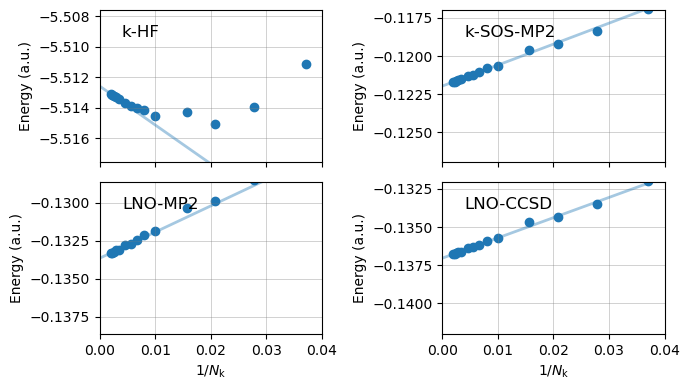

In [276]:
data = """
nk =   2, ene_krhf = -10.57681384, ene_sos_mp2 = -10.79326428, ene_mp2 = -10.79444928, ene_ccsd = -10.82239256
nk =   4, ene_krhf = -10.82926093, ene_sos_mp2 = -11.05035297, ene_mp2 = -11.05736430, ene_ccsd = -11.07756976
nk =   8, ene_krhf = -10.95722288, ene_sos_mp2 = -11.17956857, ene_mp2 = -11.18981625, ene_ccsd = -11.20864003
nk =  18, ene_krhf = -11.02146710, ene_sos_mp2 = -11.25336858, ene_mp2 = -11.27115051, ene_ccsd = -11.28348981
nk =  27, ene_krhf = -11.02226720, ene_sos_mp2 = -11.25605173, ene_mp2 = -11.27437080, ene_ccsd = -11.28618401
nk =  36, ene_krhf = -11.02792289, ene_sos_mp2 = -11.26467395, ene_mp2 = -11.28491699, ene_ccsd = -11.29483350
nk =  48, ene_krhf = -11.03010883, ene_sos_mp2 = -11.26857550, ene_mp2 = -11.28989437, ene_ccsd = -11.29878184
nk =  64, ene_krhf = -11.02864042, ene_sos_mp2 = -11.26779762, ene_mp2 = -11.28935636, ene_ccsd = -11.29799485
nk = 100, ene_krhf = -11.02907773, ene_sos_mp2 = -11.27033387, ene_mp2 = -11.29283204, ene_ccsd = -11.30054572
nk = 125, ene_krhf = -11.02832250, ene_sos_mp2 = -11.26990387, ene_mp2 = -11.29249297, ene_ccsd = -11.30010633
nk = 150, ene_krhf = -11.02806799, ene_sos_mp2 = -11.27021198, ene_mp2 = -11.29301102, ene_ccsd = -11.30040760
nk = 180, ene_krhf = -11.02778381, ene_sos_mp2 = -11.27025893, ene_mp2 = -11.29318609, ene_ccsd = -11.30045017
nk = 216, ene_krhf = -11.02735807, ene_sos_mp2 = -11.26998096, ene_mp2 = -11.29294901, ene_ccsd = -11.30015458
nk = 294, ene_krhf = -11.02692198, ene_sos_mp2 = -11.26998408, ene_mp2 = -11.29308047, ene_ccsd = -11.30015878
nk = 343, ene_krhf = -11.02667651, ene_sos_mp2 = -11.26981204, ene_mp2 = -11.29292967, ene_ccsd = -11.29997516
nk = 392, ene_krhf = -11.02647084, ene_sos_mp2 = -11.26974219, ene_mp2 = -11.29289261, ene_ccsd = -11.29990501
nk = 448, ene_krhf = -11.02632498, ene_sos_mp2 = -11.26968355, ene_mp2 = -11.29285513, ene_ccsd = -11.29984460
nk = 512, ene_krhf = -11.02618017, ene_sos_mp2 = -11.26957781, ene_mp2 = -11.29276065, ene_ccsd = -11.29973094
"""

data = data.split("\n")
data = [d.split() for d in data if len(d) > 1]
nk = [int(d[2][:-1]) for d in data]
ene_krhf    = numpy.array([float(d[5][:-1]) / 2 for d in data]) 
ene_sos_mp2 = numpy.array([float(d[8][:-1]) / 2 for d in data])
ene_mp2     = numpy.array([float(d[11][:-1]) / 2 for d in data])
ene_ccsd    = numpy.array([float(d[14][:-1]) / 2 for d in data])

ix = [-1, -2, -3, -4]
z = numpy.linspace(0, 1.0, 100)
nk = numpy.array(nk)
x = 1 / nk

fig, axs = plt.subplots(2, 2, figsize=(7, 4), sharex=True)

ax = axs[0, 0]
y = numpy.array(ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='HF fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='HF')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "k-HF", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")

ax = axs[0, 1]
y = numpy.array(ene_sos_mp2 - ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='MP2 fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='MP2')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "k-SOS-MP2", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")

ax = axs[1, 0]
y = numpy.array(ene_mp2 - ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='MP2 fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='MP2')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "LNO-MP2", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$")

ax = axs[1, 1]
y = numpy.array(ene_ccsd - ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='CCSD fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='CCSD')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "LNO-CCSD", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$")

# ax.set_ylim(-5.7, -5.5)
ax.set_xlim(0.0, 0.04)

fig.tight_layout()

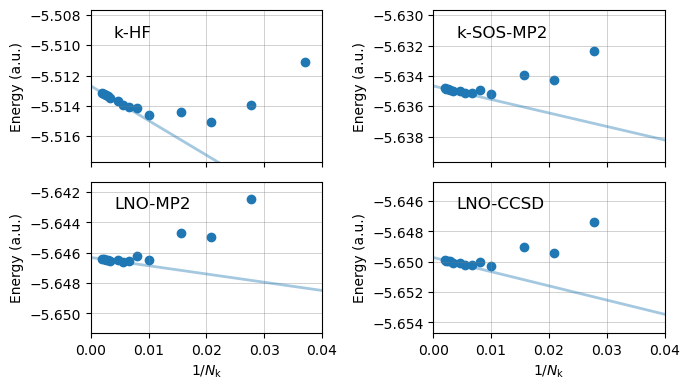

In [277]:
data = """
nk =   2, ene_krhf = -10.57682410, ene_sos_mp2 = -10.79326588, ene_mp2 = -10.79444797, ene_ccsd = -10.82239475
nk =   4, ene_krhf = -10.82926354, ene_sos_mp2 = -11.05036103, ene_mp2 = -11.05737409, ene_ccsd = -11.07757830
nk =   8, ene_krhf = -10.95722433, ene_sos_mp2 = -11.17958906, ene_mp2 = -11.18984248, ene_ccsd = -11.20866367
nk =  18, ene_krhf = -11.02151491, ene_sos_mp2 = -11.25340190, ene_mp2 = -11.27117904, ene_ccsd = -11.28352051
nk =  27, ene_krhf = -11.02227872, ene_sos_mp2 = -11.25604321, ene_mp2 = -11.27435564, ene_ccsd = -11.28617184
nk =  36, ene_krhf = -11.02794901, ene_sos_mp2 = -11.26467121, ene_mp2 = -11.28490444, ene_ccsd = -11.29482566
nk =  48, ene_krhf = -11.03012751, ene_sos_mp2 = -11.26858440, ene_mp2 = -11.28989990, ene_ccsd = -11.29878902
nk =  64, ene_krhf = -11.02874276, ene_sos_mp2 = -11.26788283, ene_mp2 = -11.28943564, ene_ccsd = -11.29807703
nk = 100, ene_krhf = -11.02918477, ene_sos_mp2 = -11.27042144, ene_mp2 = -11.29291282, ene_ccsd = -11.30062989
nk = 125, ene_krhf = -11.02832098, ene_sos_mp2 = -11.26987896, ene_mp2 = -11.29245991, ene_ccsd = -11.30007734
nk = 150, ene_krhf = -11.02814471, ene_sos_mp2 = -11.27026685, ene_mp2 = -11.29305826, ene_ccsd = -11.30045866
nk = 180, ene_krhf = -11.02783412, ene_sos_mp2 = -11.27029569, ene_mp2 = -11.29321813, ene_ccsd = -11.30048458
nk = 216, ene_krhf = -11.02738350, ene_sos_mp2 = -11.26998096, ene_mp2 = -11.29294013, ene_ccsd = -11.30015017
nk = 294, ene_krhf = -11.02692286, ene_sos_mp2 = -11.26996030, ene_mp2 = -11.29304807, ene_ccsd = -11.30013073
nk = 343, ene_krhf = -11.02670439, ene_sos_mp2 = -11.26981393, ene_mp2 = -11.29292248, ene_ccsd = -11.29997256
nk = 392, ene_krhf = -11.02652810, ene_sos_mp2 = -11.26977764, ene_mp2 = -11.29292043, ene_ccsd = -11.29993668
nk = 448, ene_krhf = -11.02638285, ene_sos_mp2 = -11.26971944, ene_mp2 = -11.29288333, ene_ccsd = -11.29987669
nk = 512, ene_krhf = -11.02626624, ene_sos_mp2 = -11.26964054, ene_mp2 = -11.29281523, ene_ccsd = -11.29978964
"""

data = data.split("\n")
data = [d.split() for d in data if len(d) > 1]
nk = [int(d[2][:-1]) for d in data]
ene_krhf = [float(d[5][:-1]) / 2 for d in data]
ene_sos_mp2 = [float(d[8][:-1]) / 2 for d in data]
ene_mp2 = [float(d[11][:-1]) / 2 for d in data]
ene_ccsd = [float(d[14][:-1]) / 2 for d in data]

ix = [-1, -2, -3, -4]
z = numpy.linspace(0, 1.0, 100)
nk = numpy.array(nk)
x = 1 / nk

fig, axs = plt.subplots(2, 2, figsize=(7, 4), sharex=True)

ax = axs[0, 0]
y = numpy.array(ene_krhf)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='HF fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='HF')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "k-HF", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")

ax = axs[0, 1]
y = numpy.array(ene_sos_mp2)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='MP2 fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='MP2')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "k-SOS-MP2", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")

ax = axs[1, 0]
y = numpy.array(ene_mp2)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='MP2 fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='MP2')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "LNO-MP2", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$")

ax = axs[1, 1]
y = numpy.array(ene_ccsd)
r = numpy.polyfit(x[ix], y[ix], 1)
poly = numpy.poly1d(r)
ax.plot(z, poly(z), label='CCSD fit', linewidth=2, alpha=0.4)
ax.scatter(x, y, label='CCSD')
ax.set_ylim(r[1] - 5e-3, r[1] + 5e-3)
ax.text(0.1, 0.9, "LNO-CCSD", transform=ax.transAxes, ha='left', va='top', fontsize=12)
ax.grid(
    color='grey',
    linestyle='-',
    linewidth=0.5,
    alpha=0.5
)
ax.set_ylabel("Energy (a.u.)")
ax.set_xlabel(r"$1 / N_{\mathrm{k}}$")

# ax.set_ylim(-5.7, -5.5)
ax.set_xlim(0.0, 0.04)

fig.tight_layout()